In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [4]:
# Load the dataset
file_path = '/content/CSE440_sentiment_analysis_dataset.xlsx - Sheet1.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows
print(data.head())

  Checker  Annotaions                                           Comments  \
0     NaN         8.0  এনার সাথে ভালো ব্যবহার করুন। গালাগালি করবেননা।...   
1     NaN         8.0  সানি লিওন কোন এক মুভির সুটিং করার জন্য বিমানে ...   
2     NaN         8.0  কে তুমি বৎস ধরিয়া মৎস বেচিয়া গঞ্জে অকুল কুঞ্...   
3     NaN         8.0       নেইমারের প্যান্ট কেনার জন্য টাকা তোলা হচ্ছে!   
4     NaN         8.0  ব্রা ফ্যানদের অনুরোধ করছি লজ্জা থাকলে বাহিরে ব...   

  ReactCount  ReplyCount  
0        469  15 replies  
1        297  54 replies  
2         40     1 reply  
3        304  38 replies  
4         42  16 replies  


**Data Cleaning and Preprocessing**

<ipython-input-8-7aa50bf90891>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=annotation_counts.index, y=annotation_counts.values, palette="viridis")


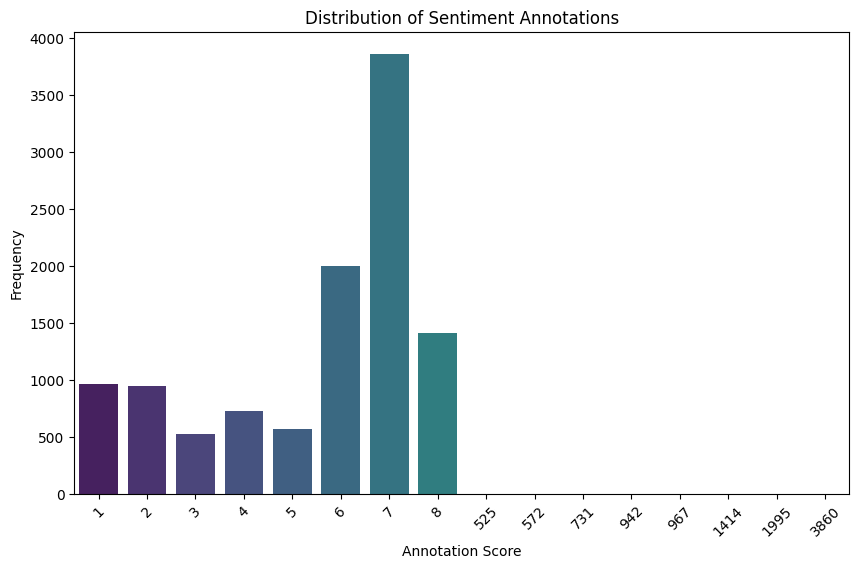

In [8]:
# Select relevant columns and drop rows with missing essential values
data = data[['Annotaions', 'Comments', 'ReactCount', 'ReplyCount']].dropna(subset=['Annotaions', 'Comments'])

# Convert ReactCount and ReplyCount to numeric values, replacing non-numeric values with 0
data['ReactCount'] = pd.to_numeric(data['ReactCount'], errors='coerce').fillna(0)
data['ReplyCount'] = pd.to_numeric(data['ReplyCount'], errors='coerce').fillna(0)

# Convert annotations to integer for classification
data['Annotaions'] = data['Annotaions'].astype(int)

# Count the occurrences of each unique annotation
annotation_counts = data['Annotaions'].value_counts().sort_index()

# Ensure all comments are treated as strings
X = data['Comments'].astype(str)

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=annotation_counts.index, y=annotation_counts.values, palette="viridis")
plt.title('Distribution of Sentiment Annotations')
plt.xlabel('Annotation Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Text Vectorization Using TF**

In [11]:
# Convert all entries in 'Comments' to strings, ensuring non-string entries are handled
data['Comments'] = data['Comments'].apply(lambda x: str(x) if not pd.isnull(x) else "")

# Identify and remove rare classes (those with fewer than 2 instances)
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 2].index

# Filter out rows with rare classes
filtered_data = data[~data['Annotaions'].isin(rare_classes)]

# Redefine X and y after filtering
X = filtered_data['Comments']
y = filtered_data['Annotaions']

# Convert all comments to strings in case there are non-string entries
X = X.astype(str)

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


**Machine Learning Algorithm Testing**

In [12]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_val)
print("Logistic Regression Performance:")
print(classification_report(y_val, y_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           1       0.51      0.24      0.33       145
           2       0.56      0.23      0.32       141
           3       0.68      0.19      0.30        79
           4       0.67      0.22      0.33       109
           5       0.70      0.08      0.15        86
           6       0.40      0.36      0.38       299
           7       0.42      0.79      0.54       579
           8       0.35      0.14      0.20       212

    accuracy                           0.43      1650
   macro avg       0.54      0.28      0.32      1650
weighted avg       0.47      0.43      0.39      1650

